#  Project 3 (Chicago Crime Rate Prediction using fbprophet open source file)


# Step 1 import libraries


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet


In [2]:
dataframe_1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False)
dataframe_2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
dataframe_3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
dataframe_4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
dataframe = pd.concat([dataframe_1,dataframe_2,dataframe_3,dataframe_4])

In [4]:
dataframe_1.shape


(1923515, 23)

In [5]:
dataframe_2.shape

(1872343, 23)

In [6]:
dataframe_3.shape

(2688710, 23)

In [7]:
dataframe_4.shape

(1456714, 23)

In [8]:
dataframe.shape

(7941282, 23)

#  Step 2 Exploring the dataset


In [9]:
dataframe.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [10]:
dataframe.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016.0,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016.0,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016.0,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016.0,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016.0,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


In [11]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
dataframe.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [12]:
dataframe.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4786321,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,4676906,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,4789749,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,4789765,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,4677901,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [13]:
# Assembling a datetime by rearranging the dataframe column "Date". 

dataframe.Date = pd.to_datetime(dataframe.Date, format='%m/%d/%Y %I:%M:%S %p')


In [14]:
dataframe.Date

0         2004-01-01 00:01:00
1         2003-03-01 00:00:00
2         2004-06-20 11:00:00
3         2004-12-30 20:00:00
4         2003-05-01 01:00:00
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 7941282, dtype: datetime64[ns]

In [15]:
dataframe.index = pd.DatetimeIndex(dataframe.Date)

In [16]:
dataframe

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2004-01-01 00:01:00,4786321,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,4789749,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,4789765,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


In [17]:
dataframe['Primary Type'].value_counts()

THEFT                                1640506
BATTERY                              1442716
CRIMINAL DAMAGE                       923000
NARCOTICS                             885431
OTHER OFFENSE                         491922
ASSAULT                               481661
BURGLARY                              470958
MOTOR VEHICLE THEFT                   370548
ROBBERY                               300453
DECEPTIVE PRACTICE                    280931
CRIMINAL TRESPASS                     229366
PROSTITUTION                           86401
WEAPONS VIOLATION                      77429
PUBLIC PEACE VIOLATION                 58548
OFFENSE INVOLVING CHILDREN             51441
CRIM SEXUAL ASSAULT                    29868
SEX OFFENSE                            28707
GAMBLING                               18806
LIQUOR LAW VIOLATION                   17513
INTERFERENCE WITH PUBLIC OFFICER       15710
ARSON                                  13097
HOMICIDE                                9051
KIDNAPPING

In [18]:
dataframe['Primary Type'].value_counts().iloc[:15]

THEFT                         1640506
BATTERY                       1442716
CRIMINAL DAMAGE                923000
NARCOTICS                      885431
OTHER OFFENSE                  491922
ASSAULT                        481661
BURGLARY                       470958
MOTOR VEHICLE THEFT            370548
ROBBERY                        300453
DECEPTIVE PRACTICE             280931
CRIMINAL TRESPASS              229366
PROSTITUTION                    86401
WEAPONS VIOLATION               77429
PUBLIC PEACE VIOLATION          58548
OFFENSE INVOLVING CHILDREN      51441
Name: Primary Type, dtype: int64

In [19]:
order_data = dataframe['Primary Type'].value_counts().iloc[:15].index

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

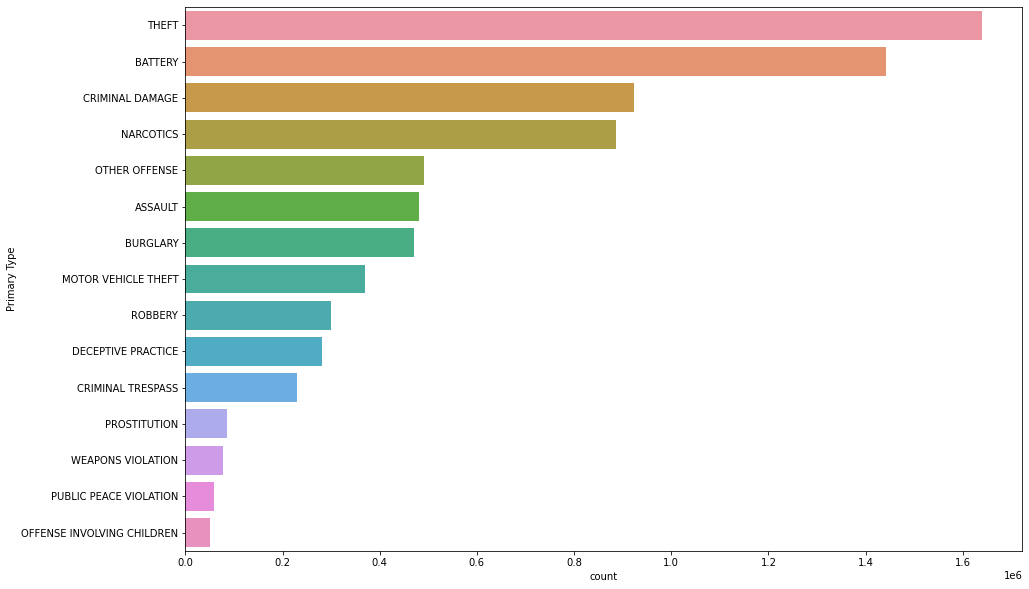

In [20]:
plt.figure(figsize = (15,10))
sns.countplot(y='Primary Type', data=dataframe, order=order_data)

<AxesSubplot:xlabel='count', ylabel='Location Description'>

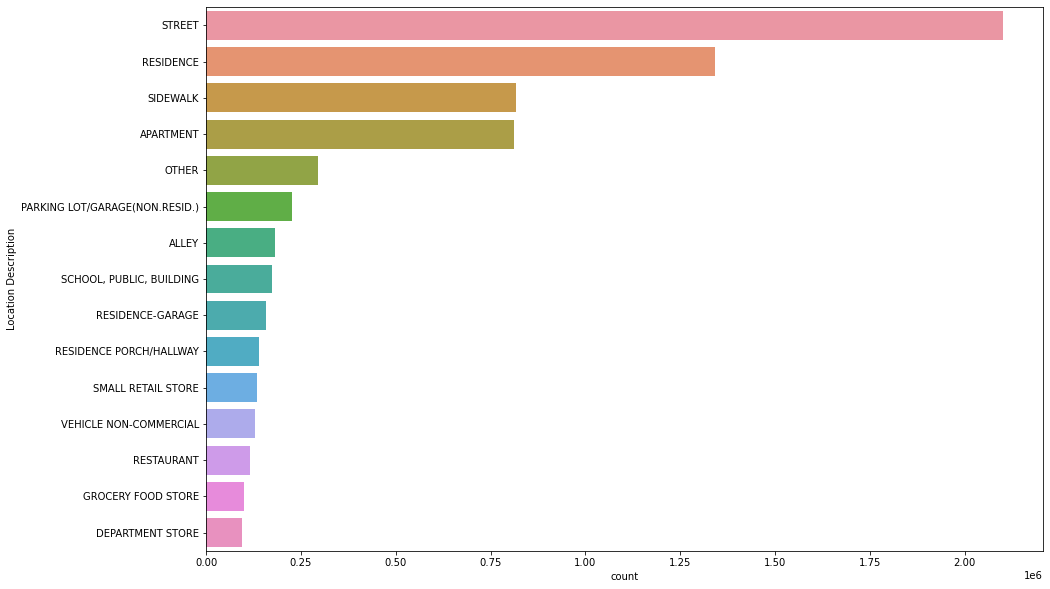

In [21]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = dataframe, order = dataframe['Location Description'].value_counts().iloc[:15].index)

In [22]:
dataframe.resample('Y').size()  #how many crimes occured

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'NUmber of crimes')

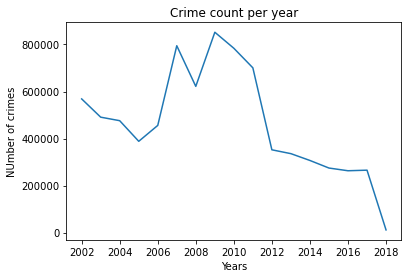

In [23]:
plt.plot(dataframe.resample('Y').size())
plt.title('Crime count per year')
plt.xlabel('Years')
plt.ylabel('NUmber of crimes')

Text(0, 0.5, 'NUmber of crimes')

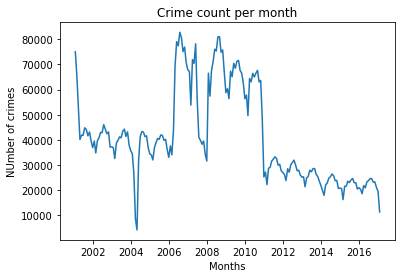

In [24]:
plt.plot(dataframe.resample('M').size())
plt.title('Crime count per month')
plt.xlabel('Months')
plt.ylabel('NUmber of crimes')

Text(0, 0.5, 'NUmber of crimes')

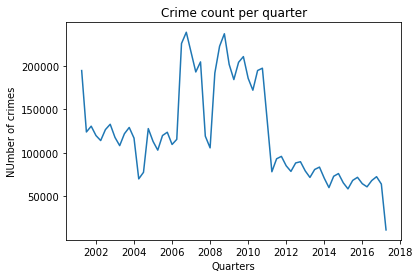

In [25]:
plt.plot(dataframe.resample('Q').size())
plt.title('Crime count per quarter')
plt.xlabel('Quarters')
plt.ylabel('NUmber of crimes')

#   Step 3 Preparing the data

In [26]:
chicago_prophet = dataframe.resample('M').size().reset_index()

In [27]:
chicago_prophet   #will give crime rate per month

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [28]:
chicago_prophet.columns = ['Date', 'Crime Rate']

In [29]:
chicago_prophet

,Date,Crime Rate
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [30]:
chicago_prophet_df_final = chicago_prophet.rename(columns={'Date':'ds', 'Crime Rate':'y'})


In [31]:
chicago_prophet_df_final

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


#  Step 4 Making Predictons

In [32]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [34]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40553.469848,22958.246067,55181.861467,40553.469848,40553.469848,-1576.979214,-1576.979214,-1576.979214,-1576.979214,-1576.979214,-1576.979214,0.0,0.0,0.0,38976.490634
1,2001-02-28,40700.768217,18713.466365,49491.007717,40700.768217,40700.768217,-6453.880275,-6453.880275,-6453.880275,-6453.880275,-6453.880275,-6453.880275,0.0,0.0,0.0,34246.887942
2,2001-03-31,40863.848554,23025.152678,53735.574801,40863.848554,40863.848554,-2068.378242,-2068.378242,-2068.378242,-2068.378242,-2068.378242,-2068.378242,0.0,0.0,0.0,38795.470312
3,2001-04-30,41021.668234,25340.856232,55959.184680,41021.668234,41021.668234,-1473.074154,-1473.074154,-1473.074154,-1473.074154,-1473.074154,-1473.074154,0.0,0.0,0.0,39548.594080
4,2001-05-31,41184.748571,28070.692324,60127.730947,41184.748571,41184.748571,3882.710448,3882.710448,3882.710448,3882.710448,3882.710448,3882.710448,0.0,0.0,0.0,45067.459019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2018-01-27,9103.019235,-10765.019353,21046.263574,8825.326063,9387.104271,-3423.691734,-3423.691734,-3423.691734,-3423.691734,-3423.691734,-3423.691734,0.0,0.0,0.0,5679.327501
554,2018-01-28,9089.027815,-9066.904775,21035.693684,8810.574019,9374.201498,-2770.715779,-2770.715779,-2770.715779,-2770.715779,-2770.715779,-2770.715779,0.0,0.0,0.0,6318.312036
555,2018-01-29,9075.036395,-10151.920472,22703.297955,8795.821974,9361.298725,-2233.869517,-2233.869517,-2233.869517,-2233.869517,-2233.869517,-2233.869517,0.0,0.0,0.0,6841.166877
556,2018-01-30,9061.044974,-9189.408033,22609.170922,8781.069929,9348.395952,-1838.620259,-1838.620259,-1838.620259,-1838.620259,-1838.620259,-1838.620259,0.0,0.0,0.0,7222.424715


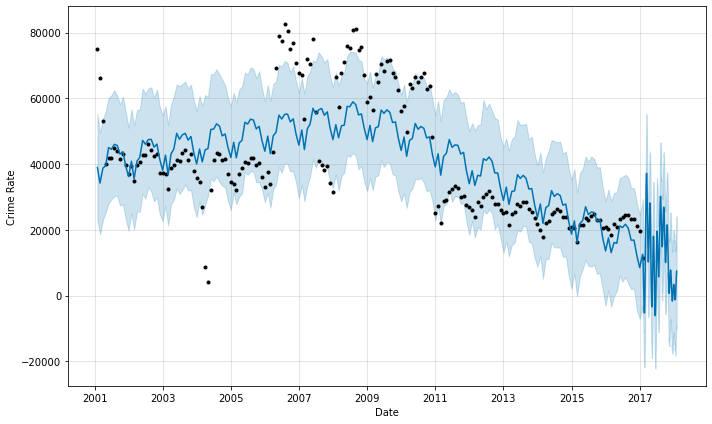

In [35]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

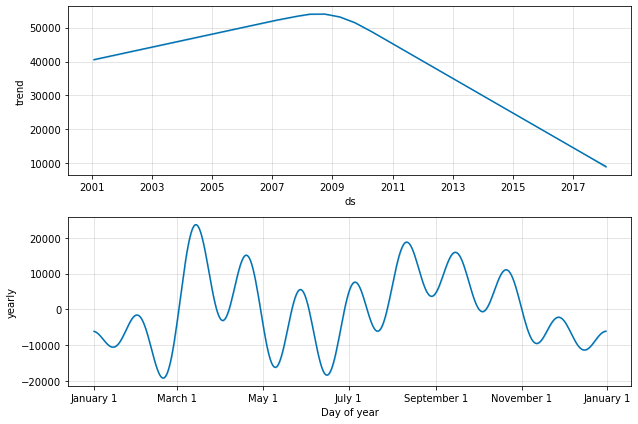

In [36]:
figure3 = m.plot_components(forecast)

In [39]:
# Forcasting into the future
future = m.make_future_dataframe(periods=1095)
forecast = m.predict(future)

In [40]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40553.469848,21111.920166,53888.791860,40553.469848,40553.469848,-1576.979214,-1576.979214,-1576.979214,-1576.979214,-1576.979214,-1576.979214,0.0,0.0,0.0,38976.490634
1,2001-02-28,40700.768217,19150.272967,50489.720519,40700.768217,40700.768217,-6453.880275,-6453.880275,-6453.880275,-6453.880275,-6453.880275,-6453.880275,0.0,0.0,0.0,34246.887942
2,2001-03-31,40863.848554,22720.265991,54483.942807,40863.848554,40863.848554,-2068.378242,-2068.378242,-2068.378242,-2068.378242,-2068.378242,-2068.378242,0.0,0.0,0.0,38795.470312
3,2001-04-30,41021.668234,24205.563532,56362.333537,41021.668234,41021.668234,-1473.074154,-1473.074154,-1473.074154,-1473.074154,-1473.074154,-1473.074154,0.0,0.0,0.0,39548.594080
4,2001-05-31,41184.748571,28559.554424,60630.972999,41184.748571,41184.748571,3882.710448,3882.710448,3882.710448,3882.710448,3882.710448,3882.710448,0.0,0.0,0.0,45067.459019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2020-01-27,-1110.717664,-20390.803924,10489.873611,-2930.847066,688.405371,-3785.080115,-3785.080115,-3785.080115,-3785.080115,-3785.080115,-3785.080115,0.0,0.0,0.0,-4895.797779
1284,2020-01-28,-1124.709085,-19672.250489,12329.705802,-2945.549646,675.912493,-3084.385261,-3084.385261,-3084.385261,-3084.385261,-3084.385261,-3084.385261,0.0,0.0,0.0,-4209.094346
1285,2020-01-29,-1138.700505,-19913.192709,12294.302119,-2961.620521,663.419616,-2486.116710,-2486.116710,-2486.116710,-2486.116710,-2486.116710,-2486.116710,0.0,0.0,0.0,-3624.817215
1286,2020-01-30,-1152.691925,-19817.467720,11784.864700,-2977.695464,651.155856,-2017.074122,-2017.074122,-2017.074122,-2017.074122,-2017.074122,-2017.074122,0.0,0.0,0.0,-3169.766047


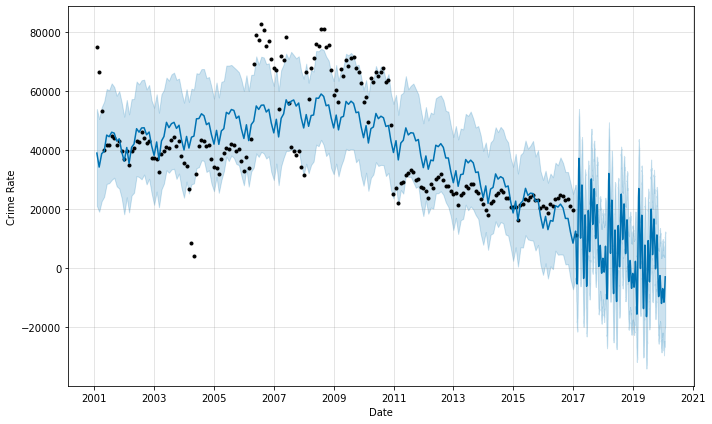

In [41]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

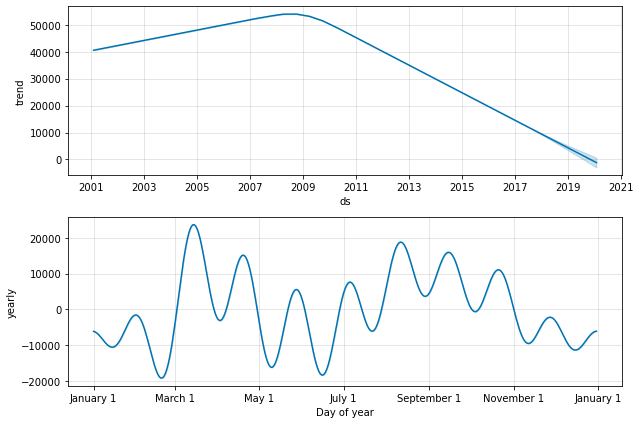

In [42]:
figure3 = m.plot_components(forecast)